# Trabalho Ficha 1

Instalação Mewpy 

In [17]:
pip install mewpy

Instalação Gurobi

In [18]:
conda config --add channels http://conda.anaconda.org/gurobi


Note: you may need to restart the kernel to use updated packages.


In [19]:
conda install gurobi

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Cristiana\anaconda3
Note: you may need to restart the kernel to use updated packages.


  added / updated specs:
    - gurobi


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.11.0-py38haa244f~ --> pkgs/main::conda-4.11.0-py38haa95532_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [20]:
pip install gurobipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
from mewpy.simulation import set_default_solver
set_default_solver('gurobi')

Set parameter Username
Academic license - for non-commercial use only - expires 2022-12-11


### Importação do modelo usando COBRApy

In [2]:
from cobra.io import read_sbml_model
model = read_sbml_model('iML1515.xml')

### Contrução da simulação

In [3]:
from mewpy.simulation import get_simulator
simul = get_simulator(model)

In [18]:
simul.summary()

Metabolites: 1877
Reactions: 2712
Genes: 1516


### 1. Qual é a produção wild-type de malato?

De forma a calcular a produção wild-type de malato considerou-se o estado de crescimento ótimo de E. coli. Para isso, procedeu-se à simulação da maximização da biomassa, tendo em conta as condições ambientais estabelecidas (consumo de oxigénio e glucose de 0 e 15 mmol/gDW/h, respetivamente).

IDs dos compostos de interesse

In [5]:
simul.find('BIOMASS')

,id,name,lb,ub,stoichiometry,gpr
0,BIOMASS_Ec_iML1515_core_75p37M,E. coli biomass objective function (iML1515) -...,0.0,1000.0,"{'10fthf_c': -0.000223, '2fe2s_c': -2.6e-05, '...",
1,BIOMASS_Ec_iML1515_WT_75p37M,E. coli biomass objective function (iML1515) -...,0.0,1000.0,"{'10fthf_c': -0.000223, '2dmmql8_c': -0.000223...",


In [6]:
simul.find('EX_mal__L_e')

,id,name,lb,ub,stoichiometry,gpr
0,EX_mal__L_e,L-Malate exchange,0.0,1000.0,{'mal__L_e': -1.0},


In [7]:
simul.find('o2')

,id,name,lb,ub,stoichiometry,gpr
0,EX_co2_e,CO2 exchange,-1000.0,1000.0,{'co2_e': -1.0},
1,EX_h2o2_e,Hydrogen peroxide exchange,0.0,1000.0,{'h2o2_e': -1.0},
2,EX_no2_e,Nitrite exchange,0.0,1000.0,{'no2_e': -1.0},
3,EX_so2_e,Sulfur dioxide exchange,0.0,1000.0,{'so2_e': -1.0},
4,EX_o2_e,O2 exchange,-1000.0,1000.0,{'o2_e': -1.0},
5,EX_o2s_e,Superoxide anion exchange,0.0,1000.0,{'o2s_e': -1.0},


In [8]:
simul.find('glc')

,id,name,lb,ub,stoichiometry,gpr
0,EX_glcn_e,D-Gluconate exchange,0.0,1000.0,{'glcn_e': -1.0},
1,EX_glc__D_e,D-Glucose exchange,-10.0,1000.0,{'glc__D_e': -1.0},
2,EX_glcur_e,D-Glucuronate exchange,0.0,1000.0,{'glcur_e': -1.0},
3,EX_2ddglcn_e,2-Dehydro-3-deoxy-D-gluconate exchange,0.0,1000.0,{'2ddglcn_e': -1.0},
4,EX_glcr_e,D-Glucarate exchange,0.0,1000.0,{'glcr_e': -1.0},
5,EX_glcur1p_e,D-Glucuronate 1-phosphate exchange,0.0,1000.0,{'glcur1p_e': -1.0},
6,EX_udpglcur_e,UDP-D-glucuronate exchange,0.0,1000.0,{'udpglcur_e': -1.0},
7,EX_5dglcn_e,5-Dehydro-D-gluconate exchange,0.0,1000.0,{'5dglcn_e': -1.0},
8,EX_2dglc_e,2-Deoxy-D-glucose exchange,0.0,1000.0,{'2dglc_e': -1.0},
9,EX_metglcur_e,1-O-methyl-Beta-D-glucuronate exchange,0.0,1000.0,{'metglcur_e': -1.0},


Condições ambientais

In [4]:
envcond = {'EX_glc__D_e': (-15, 999999.0), 'EX_o2_e': (0, 999999.0)}

In [5]:
simul = get_simulator(model, envcond = envcond)

----------------

Para biomass = 'BIOMASS_Ec_iML1515_WT_75p37M'

In [11]:
simul.objective = 'BIOMASS_Ec_iML1515_WT_75p37M'

In [12]:
simul.objective

{'BIOMASS_Ec_iML1515_WT_75p37M': 1.0}

In [13]:
result_a1 = simul.simulate(method = 'FBA')
result_a1

objective: 0.0
Status: OPTIMAL
Constraints: OrderedDict([('EX_glc__D_e', (-15, 999999.0)), ('EX_o2_e', (0, 999999.0))])
Method:FBA

In [14]:
result_a1.fluxes['EX_mal__L_e']

0.0

C:\Users\Cristiana\anaconda3\lib\site-packages\mewpy\visualization\envelope.py:126: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim((xmin - dx, xmax + dx))


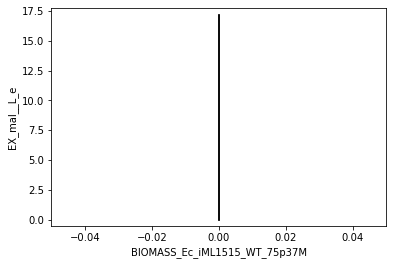

In [15]:
%matplotlib inline
from mewpy.visualization.envelope import plot_flux_envelope

plot_flux_envelope(simul,'BIOMASS_Ec_iML1515_WT_75p37M','EX_mal__L_e')

Utilizando a variável biomassa = 'BIOMASS_Ec_iML1515_WT_75p37M', obtemos uma produção de malato de 0 mmol/gDW/h.

------------------------

Para biomass = 'BIOMASS_Ec_iML1515_core_75p37M'

In [16]:
simul.objective = 'BIOMASS_Ec_iML1515_core_75p37M'

In [17]:
simul.objective

{'BIOMASS_Ec_iML1515_core_75p37M': 1.0}

In [18]:
result_a2 = simul.simulate(method='FBA')
result_a2

objective: 0.26609812519117565
Status: OPTIMAL
Constraints: OrderedDict([('EX_glc__D_e', (-15, 999999.0)), ('EX_o2_e', (0, 999999.0))])
Method:FBA

In [19]:
result_a2.fluxes['EX_mal__L_e']

0.0

In [20]:
result_a2.fluxes['BIOMASS_Ec_iML1515_core_75p37M']

0.26609812519117565

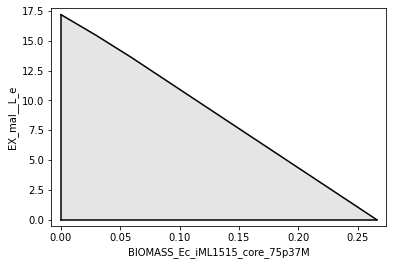

In [21]:
%matplotlib inline
from mewpy.visualization.envelope import plot_flux_envelope

plot_flux_envelope(simul,'BIOMASS_Ec_iML1515_core_75p37M','EX_mal__L_e')

Se usarmosa variável 'BIOMASS_Ec_iML1515_core_75p37M' como objetivo da simulação:

Quando o organismo otimiza a produção de biomassa, não há produz malato.


### 2. Qual é a capacidade de produção máxima de malato?

In [22]:
simul.objective = 'EX_mal__L_e'
simul.objective

{'EX_mal__L_e': 1.0}

In [23]:
result_b = simul.simulate(method = 'FBA')
result_b

objective: 17.19499999999995
Status: OPTIMAL
Constraints: OrderedDict([('EX_glc__D_e', (-15, 999999.0)), ('EX_o2_e', (0, 999999.0))])
Method:FBA

In [24]:
result_b.fluxes['EX_mal__L_e']

17.19499999999995

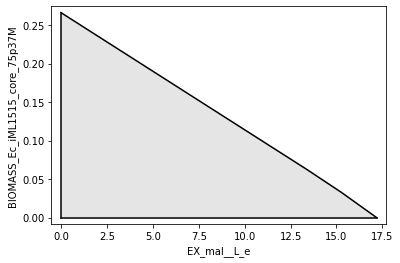

In [25]:
%matplotlib inline
from mewpy.visualization.envelope import plot_flux_envelope

plot_flux_envelope(simul,'EX_mal__L_e','BIOMASS_Ec_iML1515_core_75p37M')

A produção de malato máxima não é possível realisticamente, uma vez que é necessário haver uma produção mínima de biomassa. Assim, vai-se utilizar uma nova constraint: valor da biomassa com minimo de 10% do seu valor máximo.

In [26]:
min_biomassa = result_a2.fluxes['BIOMASS_Ec_iML1515_core_75p37M']*0.1
min_biomassa

0.026609812519117565

In [27]:
envcond2 = {'EX_glc__D_e': (-15.0, 100000.0), 'EX_o2_e':(0,0), 'BIOMASS_Ec_iML1515_core_75p37M': (min_biomassa, 10000)}

simul_env2 = get_simulator(model,envcond=envcond2)

In [28]:
result_b_env2 = simul_env2.simulate(method = 'FBA')
result_b_env2

objective: 15.635751486565097
Status: OPTIMAL
Constraints: OrderedDict([('EX_glc__D_e', (-15.0, 100000.0)), ('EX_o2_e', (0, 0)), ('BIOMASS_Ec_iML1515_core_75p37M', (0.026609812519117565, 10000))])
Method:FBA

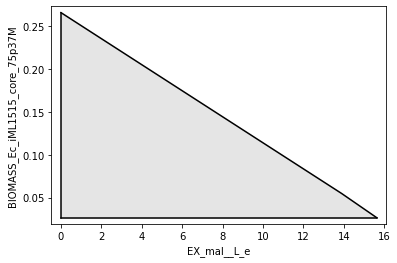

In [29]:
%matplotlib inline
from mewpy.visualization.envelope import plot_flux_envelope

plot_flux_envelope(simul_env2,'EX_mal__L_e','BIOMASS_Ec_iML1515_core_75p37M')

A produção máxima de malato corresponde a uma concentração de 15.6 mmol/gDW/h, nas condições ambientais e de biomassa descritas.

### 3. Usar diferentes funções objetivo de modo a melhorar a produção de malato, considerando que as células têm como objetivo o seu máximo crescimento.

#### 3a. Avaliar se as deleções de um único gene aumentam a produção de malato. Ordenar os mutantes obtidos de acordo com a capacidade de produção do composto e desempenho de crescimento.

In [3]:
import cobra
import pandas
from cobra.flux_analysis import single_gene_deletion

model = cobra.io.read_sbml_model('iML1515.xml')

# Condições ambientais
model.reactions.get_by_id("EX_o2_e").upper_bound = 1000
model.reactions.get_by_id("EX_o2_e").lower_bound = 0
model.reactions.get_by_id("EX_glc__D_e").upper_bound = 1000
model.reactions.get_by_id("EX_glc__D_e").lower_bound = -15

# Otimização
print(model.optimize())

model.objective = 'BIOMASS_Ec_iML1515_core_75p37M' # Objetivo é maximizar a produção de biomassa e de malato
model.objective = 'EX_mal__L_e'

model.reactions.get_by_id('BIOMASS_Ec_iML1515_core_75p37M').lower_bound = 0.266 # Fluxo de biomassa calculado na primeira pergunta
model.reactions.get_by_id('BIOMASS_Ec_iML1515_core_75p37M').upper_bound = 1000

pandas.set_option('display.max_rows', 2000)

delecao = single_gene_deletion(model)
delecoes = delecao.sort_values(by = ['growth'], ascending = False)
print(delecoes)

<Solution 0.266 at 0x2a864f04f10>
          ids    growth      status
1515  {b2241}  0.006473     optimal
358   {b1297}  0.006473     optimal
425   {b3240}  0.006473     optimal
424   {b1907}  0.006473     optimal
423   {b3825}  0.006473     optimal
422   {b1244}  0.006473     optimal
421   {b1623}  0.006473     optimal
420   {b0505}  0.006473     optimal
419   {b3620}  0.006473     optimal
1120  {b1817}  0.006473     optimal
775   {b2803}  0.006473     optimal
357   {b0121}  0.006473     optimal
427   {b4088}  0.006473     optimal
356   {b2261}  0.006473     optimal
352   {b2131}  0.006473     optimal
351   {b1002}  0.006473     optimal
350   {b1291}  0.006473     optimal
349   {b1813}  0.006473     optimal
348   {b2040}  0.006473     optimal
347   {b1967}  0.006473     optimal
346   {b3747}  0.006473     optimal
345   {b3714}  0.006473     optimal
426   {b0903}  0.006473     optimal
428   {b0200}  0.006473     optimal
343   {b3791}  0.006473     optimal
1095  {b0861}  0.006473     op

Os resultados mostram um crescimento menor que o limite mínimo definido para o crescimento/produção de biomassa. Por isso não podemos concluir se estas deleções aumentam a produção de malato.

#### 3b. Determinar a melhor estratégia, até 5 modificações, de forma a melhorar a produção de malato

Gene Knockout

Building modification target list.
Computing essential genes.


 13%|█▎        | 192/1516 [00:29<03:12,  6.90it/s]C:\Users\Cristiana\anaconda3\lib\site-packages\cobra\util\solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
100%|██████████| 1516/1516 [03:33<00:00,  7.11it/s]


Running NSGAII


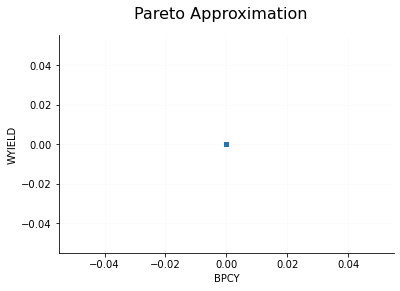

Eval(s)|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
    100|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
    200|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
    300|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
    400|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
    500|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|


In [ ]:
from mewpy.optimization.evaluation import BPCY, WYIELD
from mewpy.problems import GKOProblem
from mewpy.optimization import EA
from mewpy.simulation import SimulationMethod


PRODUCT_ID = 'EX_mal__L_e_'
BIOMASS_ID = 'BIOMASS_Ec_iML1515_core_75p37M'
GLUC_ID = 'EX_glc_e_'

model.objective = 'BIOMASS_Ec_iML1515_core_75p37M'

evaluator_1 = BPCY(BIOMASS_ID, PRODUCT_ID, method = SimulationMethod.lMOMA)
evaluator_2 = WYIELD(BIOMASS_ID, PRODUCT_ID)

problem = GKOProblem(model, fevaluation=[evaluator_1, evaluator_2], envcond = envcond, candidate_max_size = 1)

ea = EA(problem, max_generations = 5, visualizer = True, mp = True)

final_pop = ea.run()
print(final_pop)

Gene Under / Over Expression strategy

In [6]:
from mewpy.optimization.evaluation import BPCY, WYIELD
from mewpy.problems import GOUProblem
from mewpy.optimization import EA
from mewpy.simulation import SimulationMethod


PRODUCT_ID = 'EX_mal__L_e_'
BIOMASS_ID = 'BIOMASS_Ec_iML1515_core_75p37M'
GLUC_ID = 'EX_glc_e_'

model.objective = 'BIOMASS_Ec_iML1515_core_75p37M'

evaluator_1 = BPCY(BIOMASS_ID, PRODUCT_ID, method = SimulationMethod.lMOMA)
evaluator_2 = WYIELD(BIOMASS_ID, PRODUCT_ID)

problem = GOUProblem(model, fevaluation=[evaluator_1, evaluator_2], envcond = envcond, candidate_max_size = 5)

ea = EA(problem, max_generations = 5, visualizer = True, mp = True)

final_pop = ea.run()
print(final_pop[0])

Running NSGAII


SolverError: CPLEX Error  1016: Community Edition. Problem size limits exceeded. Purchase at http://ibm.biz/error1016.